<a href="https://colab.research.google.com/github/thedanindanger/yaads-examples/blob/dev/GenerativeAI/GenerativeAISampleWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [15]:
%%capture
!pip install pandasql
!pip install SQLAlchemy==1.4.46

In [18]:
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

#Downloading Data
Will use the database from a coding workshop I hosted a few years ago: https://github.com/thedanindanger/coreCodeConceptsWorkshop. It's a simple SQLite database.

I've put an updated version in a repo for this document too: https://github.com/thedanindanger/yaads-examples/tree/main/GenerativeAI

Create a directory in Google Drive for our database (if we haven't already)

In [19]:
!mkdir '/content/gdrive/MyDrive/GenerativeAIIntroWorkshop'

mkdir: cannot create directory ‘/content/gdrive/MyDrive/GenerativeAIIntroWorkshop’: File exists


Move to our newly created directory

In [20]:
!cd '/content/gdrive/MyDrive/GenerativeAIIntroWorkshop'

In [21]:
#data for database
!curl -O 'https://raw.githubusercontent.com/thedanindanger/coreCodeConceptsWorkshop/master/data/sqlitesampledatabase.sql'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  202k  100  202k    0     0   751k      0 --:--:-- --:--:-- --:--:--  749k


In [22]:
#confirm files available
!ls

classicmodels.db  gdrive  sample_data  sqlitesampledatabase.sql


# Describe our Database
## Prompt
Hello there. Could you describe this database for me? https://raw.githubusercontent.com/thedanindanger/coreCodeConceptsWorkshop/master/data/sqlitesampledatabase.sql


### Response
The database at the provided URL is a sample SQL database script focused on creating and populating tables for a hypothetical business environment. It defines a `customers` table with fields for customer details such as `customerNumber`, `customerName`, `contactLastName`, `contactFirstName`, and various address-related fields (`addressLine1`, `city`, `state`, etc.), along with `salesRepEmployeeNumber` and `creditLimit`. The script includes commands to both create the table structure and insert sample data for numerous fictional customers, encompassing various geographic locations and credit limits. You can view the full script [here](https://raw.githubusercontent.com/thedanindanger/coreCodeConceptsWorkshop/master/data/sqlitesampledatabase.sql).

## Prompt
Fantastic, thank you! Now would it be possible to create an ERD for this Database? Please use Mermaid syntax if possible, I will be updating a Google Colab notebook with this information.

### Response
Code below

Below is a Entity Relation Diagram (ERD) created using "Mermaid"

[![](https://mermaid.ink/img/pako:eNq1VlFv2jAQ_isoz20ZsNE1bxUECQ0KAjqpEi_GPoiHE6f2pRqi_PfZEBJCHLaXIUSr-86-u---s733qGTg-R6oPicbRaJl3DCf3ut8MRkHs3ljfzLYD4-xQVONMgL1kkYrUI3pjwL-IIqGRBUuJAIHKmMkFEdE402HAVd1HkkoY4eZMKZA6xGPoXUTbTuCctxVrRoJuuJLA4ieIc6VfRqj2pVJ00SAnkESRImQO4CMvMEFeQwoj4hoUAWM44hHHE_g4fTn9BuMp6PJWxBU2gLlnV1tEbWMr-upht8IseYydkAR4aJqlus1p2DJKdVnk1SQSIV6IUvIeeEvuVpwFOAoezIYDHvloh3hnFp09vU_CKhGKhU5_IuGEJTiKM_LylTM-oH5Lp6Ho4oIpGL5YLoYTpRkKUVnb95TEqMha2L3AFYVZqIMzwGhYQFpYxd5YEvMKXhd2jcTvuweM1yewH6J1aNdwXvKTYoOSIc8Sa6Ryw6lurCj0bbpTxRBjPrmIXfmqlTR9PltHLws_nZAuvpAQ6DburITsrMZXVWXNYFEVk-ubGaT_mtvMRq-uMcka73tkXNOLBl90FTxBEvTHpnjKI2OXIUYiRs-KyFXDZPlBurzu5Vb7QxneM1dcFHYDc3PKRH1q39CzKS6kkaGOSvOlX8em2E8R0m31Y6t0t3UTk4VGc9n05yp61v38_P-Xu7PY-M3EkEo6NIsWZfPz_KB4BsJUpGys2tO--V-hbO8HPaShDL_fP31xpVM83HwGxHZnt2K-ypzK9ZZv9iIRZeP-MyvWHgduUAOsuKa3zDenWdm0NxQzLxtjppbehiCUZDnm38ZUdult4wPxo-kKOe7mHo-qhTuvDSxc5i9hjx_TYTOrQGz53JuFJIYAj1_7-Eusa-oDddotjRPmDXfWHuqhDGHiIn2m00LP2w4hunqwZw8Tc2ZUSGGH0_dZrfd_U7aHeg-dsi3TofRVevp-7r9tbVmj19abeIdDnceHOOPT0-248vt8AciXwRM?type=png)](https://mermaid.live/edit#pako:eNq1VlFv2jAQ_isoz20ZsNE1bxUECQ0KAjqpEi_GPoiHE6f2pRqi_PfZEBJCHLaXIUSr-86-u---s733qGTg-R6oPicbRaJl3DCf3ut8MRkHs3ljfzLYD4-xQVONMgL1kkYrUI3pjwL-IIqGRBUuJAIHKmMkFEdE402HAVd1HkkoY4eZMKZA6xGPoXUTbTuCctxVrRoJuuJLA4ieIc6VfRqj2pVJ00SAnkESRImQO4CMvMEFeQwoj4hoUAWM44hHHE_g4fTn9BuMp6PJWxBU2gLlnV1tEbWMr-upht8IseYydkAR4aJqlus1p2DJKdVnk1SQSIV6IUvIeeEvuVpwFOAoezIYDHvloh3hnFp09vU_CKhGKhU5_IuGEJTiKM_LylTM-oH5Lp6Ho4oIpGL5YLoYTpRkKUVnb95TEqMha2L3AFYVZqIMzwGhYQFpYxd5YEvMKXhd2jcTvuweM1yewH6J1aNdwXvKTYoOSIc8Sa6Ryw6lurCj0bbpTxRBjPrmIXfmqlTR9PltHLws_nZAuvpAQ6DburITsrMZXVWXNYFEVk-ubGaT_mtvMRq-uMcka73tkXNOLBl90FTxBEvTHpnjKI2OXIUYiRs-KyFXDZPlBurzu5Vb7QxneM1dcFHYDc3PKRH1q39CzKS6kkaGOSvOlX8em2E8R0m31Y6t0t3UTk4VGc9n05yp61v38_P-Xu7PY-M3EkEo6NIsWZfPz_KB4BsJUpGys2tO--V-hbO8HPaShDL_fP31xpVM83HwGxHZnt2K-ypzK9ZZv9iIRZeP-MyvWHgduUAOsuKa3zDenWdm0NxQzLxtjppbehiCUZDnm38ZUdult4wPxo-kKOe7mHo-qhTuvDSxc5i9hjx_TYTOrQGz53JuFJIYAj1_7-Eusa-oDddotjRPmDXfWHuqhDGHiIn2m00LP2w4hunqwZw8Tc2ZUSGGH0_dZrfd_U7aHeg-dsi3TofRVevp-7r9tbVmj19abeIdDnceHOOPT0-248vt8AciXwRM)

In [23]:
import sqlite3 as sql
import pandas as pd

srpt = open('./sqlitesampledatabase.sql', 'r').read()
conn = sql.connect('./classicmodels.db') #sqlite creates new db if not available
c = conn.cursor()
c.executescript(srpt)
conn.commit()
c.close()
conn.close()

## Better Understand the Data
### Prompt
I named the database 'classicmodels.db' can you provide some sql scripts to help me learn more about what tables are available?

### Response
Certainly! If you've named your database `classicmodels.db` and you're looking to explore it further, here are some SQL scripts that can help you understand the structure of your database, such as what tables are available and the details of those tables (columns, data types, etc.). You can run these scripts from a SQLite command line, a GUI tool, or directly within a Jupyter Notebook using SQLite's Python library as shown previously.

#### 1. List All Tables

To list all tables in the database:

```sql
SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;
```

This query returns the names of all tables in your database.

#### 2. Describe Table Structure

SQLite doesn't have a direct command like `DESCRIBE table_name;` as in some other SQL databases, but you can use the `PRAGMA` statement to get information about the columns in a specific table. For example, to see the structure of the `customers` table:

```sql
PRAGMA table_info(customers);
```

Replace `customers` with other table names to inspect their structures. This command provides information about each column in the table, such as the column name, data type, whether the column can be NULL, and whether the column is part of the primary key.

#### 3. View Sample Data from a Table

To get a quick overview of what kind of data is stored in a table, you can select the first few rows. For instance, to view the first 10 rows from the `customers` table:

```sql
SELECT * FROM customers LIMIT 10;
```

This query helps you understand the data each table holds by showing you a sample.

#### Running SQL Scripts in Jupyter Notebook

If you're working in a Jupyter Notebook, make sure to import sqlite3 and connect to your database as shown in the previous steps. Then, you can execute these SQL commands using `cursor.execute()` and fetch the results to display them within your notebook. For example, to list all tables within your Jupyter Notebook:

```python
import sqlite3 as sql

# Connect to the SQLite database
conn = sql.connect('classicmodels.db')
cursor = conn.cursor()

# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables = cursor.fetchall()
for table in tables:
    print(table[0])

# Don't forget to close your connection
conn.close()
```

This approach provides a practical way to explore and learn more about your `classicmodels.db` database directly within a Jupyter Notebook environment.

In [24]:
#Connecting to now populated database
conn = sql.connect('./classicmodels.db')

#Write query to show tables. We read a meta data master file and get the names
qry = "SELECT name FROM sqlite_master WHERE type='table';"

#pandas makes it easier to read the query using the connection
#will print automatically

pd.read_sql_query(qry,conn)

,name
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


In [25]:
#query to get first few customer records from table
qry2 = 'select * from customers limit 10'
pd.read_sql_query(qry2,conn)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700
5,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165.0,210500
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,None,Warszawa,None,01-012,Poland,NaN,0
7,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504.0,59700
8,129,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,None,San Francisco,CA,94217,USA,1165.0,64600
9,131,Land of Toys Inc.,Lee,Kwai,2125557818,897 Long Airport Avenue,None,NYC,NY,10022,USA,1323.0,114900


In [26]:
# prompt: show the top 5 records from the orders table in the sqlite_master  database

qry3 = 'select * from orders limit 5'
pd.read_sql_query(qry3,conn)


,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141


In [27]:
qry3 = 'select * from orderdetails limit 5'
pd.read_sql_query(qry3,conn)

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4


## Our First Joins
### Prompt
Now can you create a query provides the total price amount of all orders for each customer?

### Response
To calculate the total price amount of all orders for each customer, you'll need to join several tables: `customers`, `orders`, `orderdetails`, and possibly `products` if you need product-specific details. However, for the total price calculation per customer, focusing on the `customers`, `orders`, and `orderdetails` tables should suffice. The calculation involves summing the product of `quantityOrdered` and `priceEach` from the `orderdetails` table for each order, grouped by the customer.

Here's the SQL query to achieve this:

```sql
SELECT c.customerNumber, c.customerName, SUM(od.quantityOrdered * od.priceEach) AS totalAmount
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY c.customerNumber, c.customerName
ORDER BY totalAmount DESC;
```

This query performs the following operations:

1. **Joins** the `customers`, `orders`, and `orderdetails` tables to align each customer with their orders and the respective order details.
2. **Calculates** the total price for each order by multiplying `quantityOrdered` by `priceEach` for each entry in `orderdetails`.
3. **Aggregates** these totals by each customer, using `SUM()` to get the total amount spent by each customer across all their orders.
4. **Groups** the results by `customerNumber` and `customerName` to ensure the totals are correctly attributed to each customer.
5. **Orders** the results by `totalAmount` in descending order to show the customers who have spent the most at the top.

To run this query in a Jupyter Notebook, you can use the sqlite3 library as demonstrated in previous examples. Remember to replace `'classicmodels.db'` with the actual path to your SQLite database file if necessary.

This query gives you insight into customer spending, helping identify your most valuable customers based on their order history.

In [28]:
qry = '''
SELECT
  c.customerNumber,
  c.customerName,
  SUM(od.quantityOrdered * od.priceEach) AS totalAmount
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY c.customerNumber, c.customerName
ORDER BY totalAmount DESC;
'''

pd.read_sql_query(qry,conn)

,customerNumber,customerName,totalAmount
0,141,Euro+ Shopping Channel,820689.54
1,124,Mini Gifts Distributors Ltd.,591827.34
2,114,"Australian Collectors, Co.",180585.07
3,151,Muscle Machine Inc,177913.95
4,119,La Rochelle Gifts,158573.12
...,...,...,...
93,381,Royale Belge,29217.18
94,473,Frau da Collezione,25358.32
95,103,Atelier graphique,22314.36
96,198,Auto-Moto Classics Inc.,21554.26


## Adding More Details
### Prompt
Thank you! Now what if I want to know the total payments received for each customer and if they have an outstanding balance?

### Response
To calculate the total payments received for each customer and determine if they have an outstanding balance, you'll need to use the `customers`, `orders`, `orderdetails`, and `payments` tables. This involves calculating two main components:

1. **Total Order Amount**: The total price of all orders placed by each customer.
2. **Total Payments**: The total amount of payments made by each customer.

Then, by comparing these totals, you can determine if a customer has an outstanding balance (i.e., if their total order amount exceeds their total payments).

Here is how you could write the SQL query to achieve this:

```sql
WITH order_totals AS (
  SELECT
    o.customerNumber,
    SUM(od.quantityOrdered * od.priceEach) AS totalOrderAmount
  FROM
    orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
  GROUP BY
    o.customerNumber
),
payment_totals AS (
  SELECT
    p.customerNumber,
    SUM(p.amount) AS totalPayments
  FROM
    payments p
  GROUP BY
    p.customerNumber
)
SELECT
  c.customerNumber,
  c.customerName,
  IFNULL(ot.totalOrderAmount, 0) AS totalOrderAmount,
  IFNULL(pt.totalPayments, 0) AS totalPayments,
  IFNULL(pt.totalPayments, 0) - IFNULL(ot.totalOrderAmount, 0) AS balance
FROM
  customers c
  LEFT JOIN order_totals ot ON c.customerNumber = ot.customerNumber
  LEFT JOIN payment_totals pt ON c.customerNumber = pt.customerNumber
ORDER BY
  c.customerNumber;
```

This query does the following:

- **`order_totals` CTE (Common Table Expression)**: Calculates the total order amount for each customer by summing up the product of `quantityOrdered` and `priceEach` from the `orderdetails` table, grouped by `customerNumber`.

- **`payment_totals` CTE**: Calculates the total payments for each customer by summing up the `amount` from the `payments` table, grouped by `customerNumber`.

- The main **SELECT** statement then joins these CTEs with the `customers` table to align each customer with their total order amounts and total payments. It uses `LEFT JOIN` to ensure all customers are included, even if they haven't made any orders or payments.

- The **`balance`** column calculates the difference between total payments and total order amounts. A negative balance indicates an outstanding amount the customer owes, while a positive balance would indicate overpayment.

- **Ordering** by `customerNumber` to organize the output.

By running this query, you'll get a list of all customers, their total order amounts, their total payments, and their current balance, indicating whether they owe money (negative balance) or have overpaid (positive balance).

In [29]:
qry = '''
WITH order_totals AS (
  SELECT
    o.customerNumber,
    SUM(od.quantityOrdered * od.priceEach) AS totalOrderAmount
  FROM
    orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
  GROUP BY
    o.customerNumber
),
payment_totals AS (
  SELECT
    p.customerNumber,
    SUM(p.amount) AS totalPayments
  FROM
    payments p
  GROUP BY
    p.customerNumber
)
SELECT
  c.customerNumber,
  c.customerName,
  IFNULL(ot.totalOrderAmount, 0) AS totalOrderAmount,
  IFNULL(pt.totalPayments, 0) AS totalPayments,
  IFNULL(pt.totalPayments, 0) - IFNULL(ot.totalOrderAmount, 0) AS balance
FROM
  customers c
  LEFT JOIN order_totals ot ON c.customerNumber = ot.customerNumber
  LEFT JOIN payment_totals pt ON c.customerNumber = pt.customerNumber
ORDER BY
  IFNULL(pt.totalPayments, 0) - IFNULL(ot.totalOrderAmount, 0) desc;
'''

pd.read_sql_query(qry,conn)

,customerNumber,customerName,totalOrderAmount,totalPayments,balance
0,121,Baane Mini Imports,104224.79,104224.79,2.910383e-11
1,128,"Blauer See Auto, Co.",75937.76,75937.76,2.910383e-11
2,146,"Saveley & Henriot, Co.",130305.35,130305.35,2.910383e-11
3,148,"Dragon Souveniers, Ltd.",156251.03,156251.03,2.910383e-11
4,276,"Annas Decorations, Ltd",137034.22,137034.22,2.910383e-11
...,...,...,...,...,...
117,201,"UK Collectables, Ltd.",106610.72,61167.18,-4.544354e+04
118,362,Gifts4AllAges.com,84340.32,33533.47,-5.080685e+04
119,382,Salzburg Collectables,137480.07,85060.00,-5.242007e+04
120,450,The Sharp Gifts Warehouse,143536.27,59551.38,-8.398489e+04


## The Interview Question
### Prompt
Perfect, thanks! Now I would like to know the three customer names with the highest outstanding balance in each city.
### Response
To find the three customers with the highest outstanding balance in each city, you can extend the previous query with calculations for the outstanding balance. Then, use window functions to partition the results by city and order by the outstanding balance. Finally, filter to get the top three customers per city based on their outstanding balances.

Here's how you can structure this query:

```sql
WITH order_totals AS (
  SELECT
    o.customerNumber,
    SUM(od.quantityOrdered * od.priceEach) AS totalOrderAmount
  FROM
    orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
  GROUP BY
    o.customerNumber
),
payment_totals AS (
  SELECT
    p.customerNumber,
    SUM(p.amount) AS totalPayments
  FROM
    payments p
  GROUP BY
    p.customerNumber
),
customer_balances AS (
  SELECT
    c.customerNumber,
    c.customerName,
    c.city,
    IFNULL(ot.totalOrderAmount, 0) - IFNULL(pt.totalPayments, 0) AS outstandingBalance
  FROM
    customers c
    LEFT JOIN order_totals ot ON c.customerNumber = ot.customerNumber
    LEFT JOIN payment_totals pt ON c.customerNumber = pt.customerNumber
)
SELECT
  city,
  customerName,
  outstandingBalance
FROM (
  SELECT
    *,
    ROW_NUMBER() OVER(PARTITION BY city ORDER BY outstandingBalance DESC) AS rn
  FROM
    customer_balances
) ranked
WHERE rn <= 3
ORDER BY city, outstandingBalance DESC;
```

In this query:

- The **`WITH` clauses** (`order_totals`, `payment_totals`, `customer_balances`) calculate the total orders and payments for each customer, and then determine each customer's outstanding balance.

- In the **`customer_balances`** CTE, `IFNULL` ensures that customers without orders or payments are considered with a balance of `0`.

- The **subquery** with `ROW_NUMBER()` partitions the results by `city` and orders them within each partition by `outstandingBalance` in descending order. This assigns a row number (`rn`) to each customer within their city based on their outstanding balance.

- The **outer query** filters to only include the top 3 customers (`rn <= 3`) with the highest outstanding balances in each city.

- The results are finally **ordered by `city`** and `outstandingBalance DESC` to ensure they are grouped by city and then by the highest outstanding balances within those cities.

This will give you a list of the three customers with the highest outstanding balances in each city, along with their outstanding balances.

In [30]:
qry = '''
WITH order_totals AS (
  SELECT
    o.customerNumber,
    SUM(od.quantityOrdered * od.priceEach) AS totalOrderAmount
  FROM
    orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
  GROUP BY
    o.customerNumber
),
payment_totals AS (
  SELECT
    p.customerNumber,
    SUM(p.amount) AS totalPayments
  FROM
    payments p
  GROUP BY
    p.customerNumber
),
customer_balances AS (
  SELECT
    c.customerNumber,
    c.customerName,
    c.city,
    IFNULL(ot.totalOrderAmount, 0) - IFNULL(pt.totalPayments, 0) AS outstandingBalance
  FROM
    customers c
    LEFT JOIN order_totals ot ON c.customerNumber = ot.customerNumber
    LEFT JOIN payment_totals pt ON c.customerNumber = pt.customerNumber
)
SELECT
  city,
  customerName,
  outstandingBalance
FROM (
  SELECT
    *,
    ROW_NUMBER() OVER(PARTITION BY city ORDER BY outstandingBalance DESC) AS rn
  FROM
    customer_balances
) ranked
WHERE rn <= 3
ORDER BY city, outstandingBalance DESC;
'''

pd.read_sql_query(qry,conn)

,city,customerName,outstandingBalance
0,Aachen,Warburg Exchange,0.000000e+00
1,Allentown,Diecast Classics Inc.,5.849440e+03
2,Amsterdam,Schuyler Imports,0.000000e+00
3,Auckland,GiftsForHim.com,3.776938e+04
4,Auckland,Kellys Gift Shop,2.296360e+04
...,...,...,...
113,Versailles,Auto Associés & Cie.,0.000000e+00
114,Warszawa,Havel & Zbyszek Co,0.000000e+00
115,Wellington,"Extreme Desk Decorations, Ltd",2.362744e+04
116,White Plains,Mini Classics,-1.455192e-11


## Making Adjustments
### Prompt
It looks like city was a little too granular, can you change city to state, but only show me states with more than 3 customers?
### Response
To adjust the query to focus on states instead of cities, and to only include states with more than 3 customers, you can modify the query to group by state and use a `HAVING` clause to filter states by their customer count. Here's how you can structure the revised query:

```sql
WITH order_totals AS (
  SELECT
    o.customerNumber,
    SUM(od.quantityOrdered * od.priceEach) AS totalOrderAmount
  FROM
    orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
  GROUP BY
    o.customerNumber
),
payment_totals AS (
  SELECT
    p.customerNumber,
    SUM(p.amount) AS totalPayments
  FROM
    payments p
  GROUP BY
    p.customerNumber
),
customer_balances AS (
  SELECT
    c.customerNumber,
    c.customerName,
    c.state,
    IFNULL(ot.totalOrderAmount, 0) - IFNULL(pt.totalPayments, 0) AS outstandingBalance
  FROM
    customers c
    LEFT JOIN order_totals ot ON c.customerNumber = ot.customerNumber
    LEFT JOIN payment_totals pt ON c.customerNumber = pt.customerNumber
),
state_customer_counts AS (
  SELECT
    state,
    COUNT(customerNumber) AS customerCount
  FROM
    customers
  GROUP BY
    state
  HAVING customerCount > 3
)
SELECT
  cb.state,
  cb.customerName,
  cb.outstandingBalance
FROM (
  SELECT
    cb.*,
    ROW_NUMBER() OVER(PARTITION BY cb.state ORDER BY cb.outstandingBalance DESC) AS rn
  FROM
    customer_balances cb
  JOIN
    state_customer_counts scc ON cb.state = scc.state
) ranked
WHERE rn <= 3
ORDER BY state, outstandingBalance DESC;
```

In this query:

- **`order_totals` and `payment_totals` CTEs**: These remain unchanged, calculating the total order amount and total payments for each customer.

- **`customer_balances` CTE**: Now includes `state` instead of `city` and calculates the outstanding balance for each customer.

- **`state_customer_counts` CTE**: This new CTE counts the number of customers in each state and filters to only include states with more than 3 customers using the `HAVING` clause.

- The final selection joins `customer_balances` with `state_customer_counts` to ensure we only consider customers from states with more than 3 customers. It uses the `ROW_NUMBER()` function to rank customers within each state by their outstanding balance.

- The `WHERE rn <= 3` condition ensures that only the top 3 customers by outstanding balance are selected for each eligible state.

- The results are ordered by `state` and `outstandingBalance DESC` to group them by state and sort by the highest balances within those states.

This revised query addresses the requirements by focusing on states, ensuring each state included has more than 3 customers, and then identifying the top 3 customers with the highest outstanding balances in those states.

In [31]:
qry = '''
WITH order_totals AS (
  SELECT
    o.customerNumber,
    SUM(od.quantityOrdered * od.priceEach) AS totalOrderAmount
  FROM
    orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
  GROUP BY
    o.customerNumber
),
payment_totals AS (
  SELECT
    p.customerNumber,
    SUM(p.amount) AS totalPayments
  FROM
    payments p
  GROUP BY
    p.customerNumber
),
customer_balances AS (
  SELECT
    c.customerNumber,
    c.customerName,
    c.state,
    IFNULL(ot.totalOrderAmount, 0) - IFNULL(pt.totalPayments, 0) AS outstandingBalance
  FROM
    customers c
    LEFT JOIN order_totals ot ON c.customerNumber = ot.customerNumber
    LEFT JOIN payment_totals pt ON c.customerNumber = pt.customerNumber
),
state_customer_counts AS (
  SELECT
    state,
    COUNT(customerNumber) AS customerCount
  FROM
    customers
  GROUP BY
    state
  HAVING customerCount > 3
)
SELECT
  ranked.state,
  ranked.customerName,
  ranked.outstandingBalance
FROM (
  SELECT
    cb.*,
    ROW_NUMBER() OVER(PARTITION BY cb.state ORDER BY cb.outstandingBalance DESC) AS rn
  FROM
    customer_balances cb
  JOIN
    state_customer_counts scc ON cb.state = scc.state
) ranked
WHERE rn <= 3
ORDER BY state, outstandingBalance DESC;
'''

pd.read_sql_query(qry,conn)

,state,customerName,outstandingBalance
0,CA,The Sharp Gifts Warehouse,8.398489e+04
1,CA,Mini Gifts Distributors Ltd.,7.639100e+03
2,CA,Mini Wheels Co.,0.000000e+00
3,CT,Super Scale Inc.,1.455192e-11
4,CT,American Souvenirs Inc,0.000000e+00
5,CT,Gift Depot Inc.,0.000000e+00
6,MA,Gifts4AllAges.com,5.080685e+04
7,MA,Mini Creations Ltd.,1.455192e-11
8,MA,Collectables For Less Inc.,1.455192e-11
9,NY,Land of Toys Inc.,4.144521e+04


# Section Two: Analytics
Now let's pull together some data to do a quick analysis.
Something like "For United States Customers, do certain ZIP codes have a high propensity to purchase than others?"

First, we need to see if there are enough purchases to merit such an analysis.

In [32]:
qry = '''
SELECT
  e.employeeNumber,
  e.firstName || ' ' || e.lastName AS salespersonName,
  e.jobTitle,
  off.officeCode,
  off.city AS officeCity,
  off.country AS officeCountry,
  AVG(od.quantityOrdered * od.priceEach) AS avgOrderAmount
FROM
  employees e
  JOIN offices off ON e.officeCode = off.officeCode
  JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
  JOIN orders o ON c.customerNumber = o.customerNumber
  JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY
  e.employeeNumber
ORDER BY
  avgOrderAmount DESC;
'''
data = pd.read_sql_query(qry,conn)

In [33]:
#convert the sql output to a data frame
data.head()

,employeeNumber,salespersonName,jobTitle,officeCode,officeCity,officeCountry,avgOrderAmount
0,1286,Foon Yue Tseng,Sales Rep,3,NYC,USA,3438.117394
1,1702,Martin Gerard,Sales Rep,4,Paris,France,3398.925175
2,1621,Mami Nishi,Sales Rep,5,Tokyo,Japan,3336.569854
3,1216,Steve Patterson,Sales Rep,2,Boston,USA,3328.127763
4,1165,Leslie Jennings,Sales Rep,1,San Francisco,USA,3267.463867


from pandas.core.internals.construction import treat_as_nested
#Building a simple model
Now that we have something to work with, let us make a simple model.

Nothing too serious, just a simple regression treat_as_nested

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
import numpy as np

In [35]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['jobTitle', 'officeCity', 'officeCountry'])

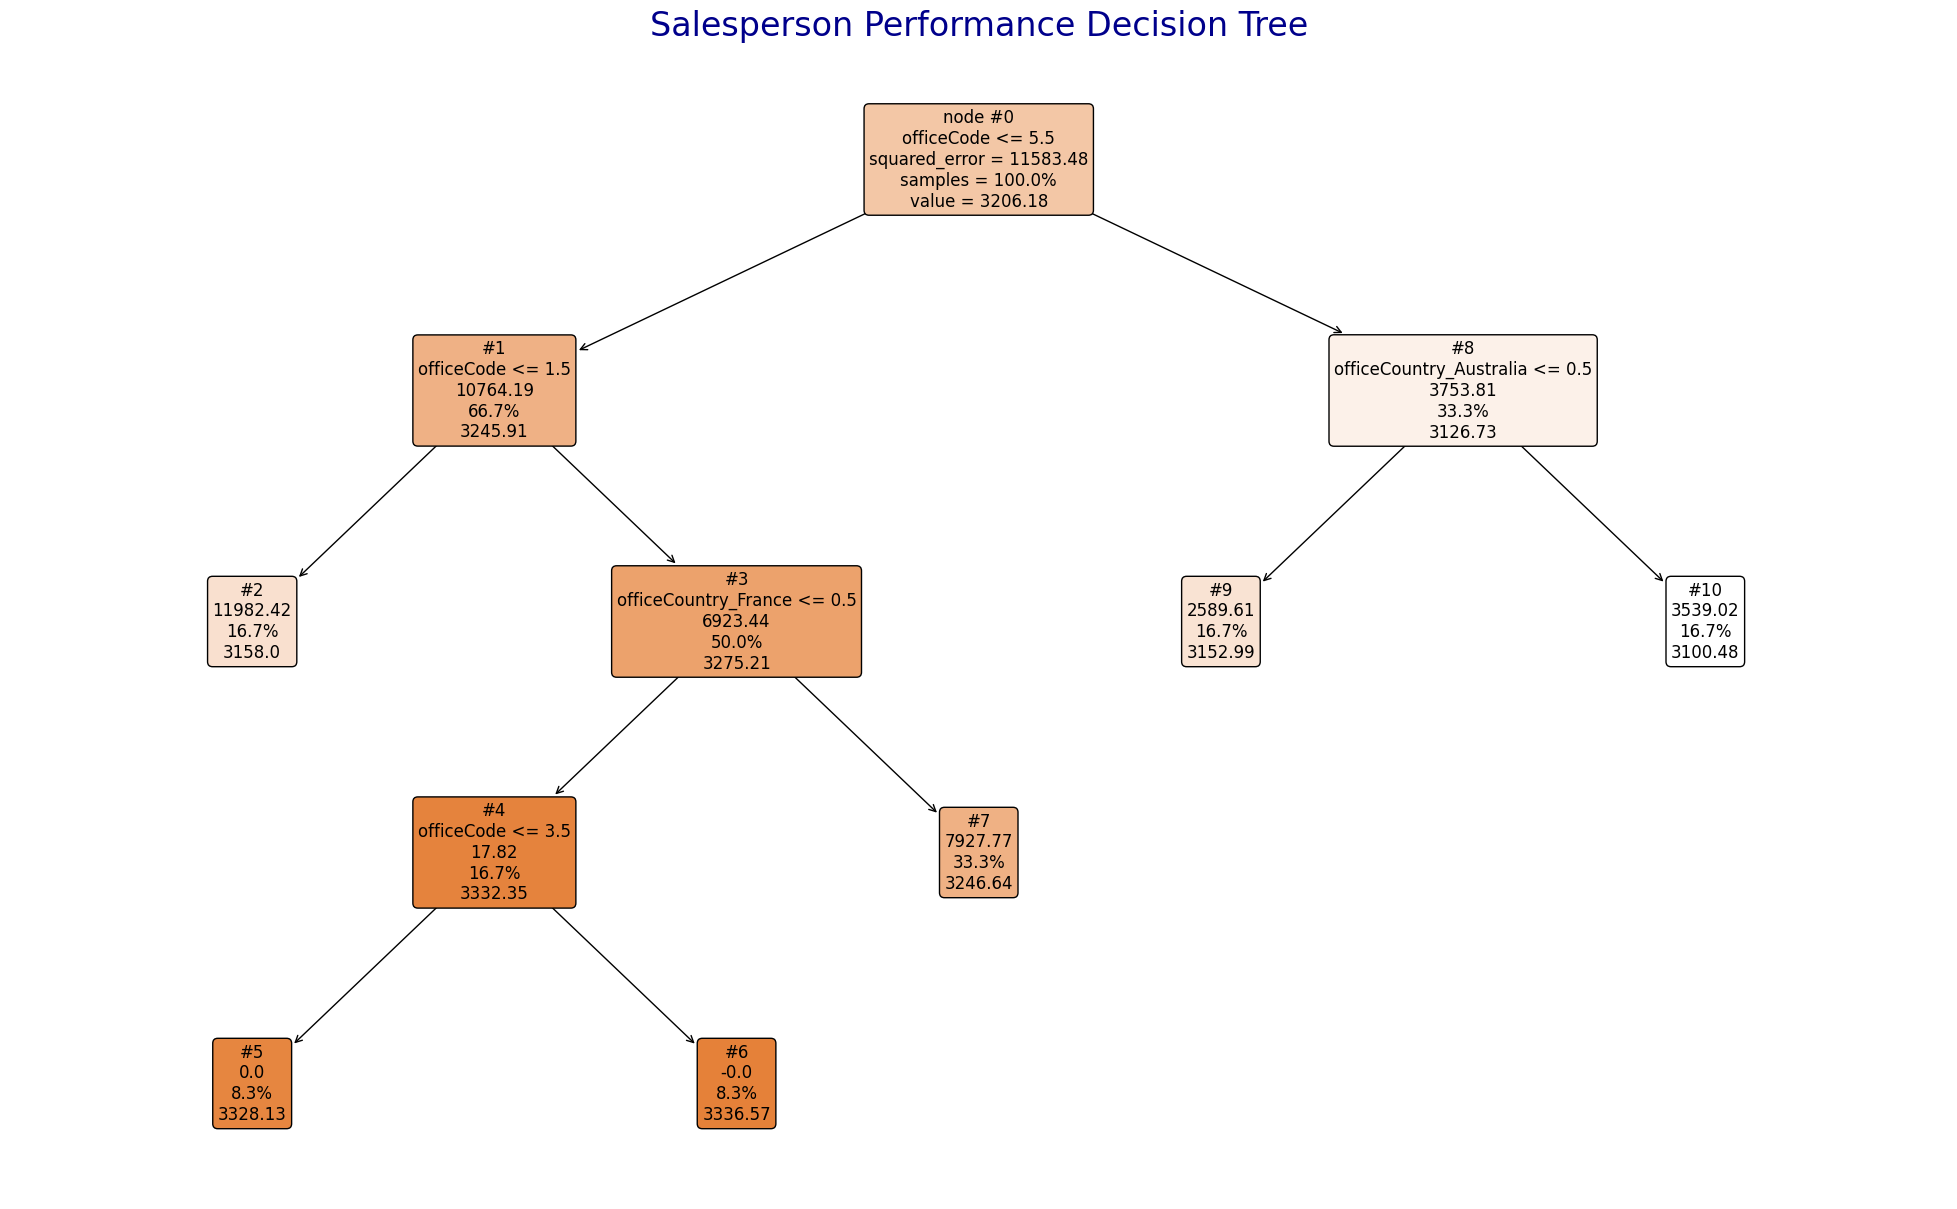

In [36]:
# Define the target variable and predictors
X = data.drop(['employeeNumber', 'salespersonName', 'avgOrderAmount'], axis=1)
y = data['avgOrderAmount']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# Visualize the decision tree with enhanced styling
plt.figure(figsize=(25,15))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True,
          fontsize=12, node_ids=True, proportion=True,
          precision=2, label='root')

# Add title and other stylistic elements
plt.title('Salesperson Performance Decision Tree', fontsize=24, color='darkblue')
plt.show()

# Analyze Spreadsheet Data
This example looks at simple spreadsheet analysis.

This is a sample data set with the following values:
- ISO Week Start Date (Date):
- Country (String): possible values "United States", "Canada", "Mexico"
- Account (String): possible values "Revenue", "Labor", "Raw Materials",  "Admin", "Utilities"
- Product (String): possible values "Product A", "Product B", "Overhead"
- Value in USD (Currency)

Out first step will be to load this data into python and have our AI summarize it.

## Prompt
Could you describe and summarize the data from the attached file? Also include a sample of the data. The file name is "dummy_data.csv"

## Output
Code generated by AI:

The dataset contains a series of records across five columns: "ISO Week Start Date", "Country", "Account", "Product", and "Value in USD". Here is a summary and sample of the data:

### Columns:
- **ISO Week Start Date**: The starting date of the ISO week (YYYY-MM-DD format).
- **Country**: The country associated with the record, with three unique countries represented.
- **Account**: The type of account, with five unique types including "Revenue", "Labor", "Raw Materials", "Admin", and "Utilities".
- **Product**: The product category, with three unique products identified as "Product A", "Product B", and "Product C".
- **Value in USD**: The value associated with each record in US dollars.

### Sample Data:

| ISO Week Start Date | Country       | Account       | Product   | Value in USD |
|---------------------|---------------|---------------|-----------|--------------|
| 2013-12-30          | United States | Revenue       | Product A | 88158.000    |
| 2013-12-30          | United States | Labor         | Product A | 17270.000    |
| 2013-12-30          | United States | Raw Materials | Product A | 19318.519    |
| 2013-12-30          | United States | Admin         | Product A | 8772.000     |
| 2013-12-30          | United States | Utilities     | Product A | 6092.000     |

### Summary Statistics:

- There are a total of **2,340 records** in the dataset.
- Data covers **52 unique ISO week start dates**.
- **Three countries** are represented: with the United States having the highest frequency of entries (780 records).
- The **Account** field has five unique entries, with "Revenue" being the most common account type (468 records).
- **Product A** is the most represented product category with 780 records.
- The **Value in USD** ranges from a minimum of \$3,003 to a maximum of \$99,082, with a mean value of approximately $19,659.12.

This dataset appears to track various financial metrics related to different products, segmented by country and account type, across a range of dates.

## Code

In [ ]:
#data for spreadsheet example, will put data in your current directory
!curl -O https://raw.githubusercontent.com/thedanindanger/yaads-examples/main/GenerativeAI/data/dummy_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  875k  100  875k    0     0  1318k      0 --:--:-- --:--:-- --:--:-- 1318k


In [ ]:
# First, let's read the uploaded file to understand its structure and content
# Load the data from the uploaded CSV file
file_path = 'dummy_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.tail()

,ISO Week Start Date,Country,Account,Product,Value in USD
15595,2023-12-11,Mexico,Revenue,Product B,65063.582994
15596,2023-12-11,Mexico,Labor,Product B,21108.498524
15597,2023-12-11,Mexico,Raw Materials,Product B,26782.088514
15598,2023-12-11,Mexico,Admin,Product B,2362.025799
15599,2023-12-11,Mexico,Utilities,Product B,1806.006061


## Visualizing Data from Spreadsheet

### Example prompt
*I'm attaching the created dummy data. Could you perform a high level Comparative and Correlation analysis on this data? Please include analytic visualizations if possible, ideally using the Altair visualization package. If you cannot produce visuals, please provide the Python code to produce your recommended visuals*

### Results

In [ ]:
# Assuming 'data' is your DataFrame loaded from the CSV
# First, filter the data for 'Revenue' account type
revenue_data = data[data['Account'] == 'Revenue'].groupby(['Country', 'Product'], as_index=False)['Value in USD'].sum()

# Creating a bar chart for comparative analysis
revenue_chart = alt.Chart(revenue_data).mark_bar().encode(
    x='Country:N',
    y='sum(Value in USD):Q',
    color='Country:N',
    column='Product:N',
    tooltip=['Country', 'Product', 'sum(Value in USD)']
).properties(
    title='Total Revenue by Product and Country'
)

revenue_chart

alt.Chart(...)

In [ ]:
# Preparing data for correlation analysis
# Filter the data for relevant accounts and a specific product/country if desired
correlation_data = data[data['Account'].isin(['Labor', 'Raw Materials', 'Revenue'])]

# Pivot the data to have accounts as columns
correlation_pivot = correlation_data.pivot_table(index=['ISO Week Start Date', 'Country', 'Product'],
                                                 columns='Account', values='Value in USD').reset_index()

min_x = correlation_pivot['Labor'].min()
max_x = correlation_pivot['Labor'].max()

min_y = correlation_pivot['Revenue'].min()
max_y = correlation_pivot['Revenue'].max()

# Creating scatter plots to visualize correlations
# Example: Correlation between Labor and Revenue
labor_revenue_corr_chart = alt.Chart(correlation_pivot).mark_circle(size=60).encode(
    x=alt.X('Labor:Q', scale=alt.Scale(domain=[min_x, max_x])),
    y=alt.Y('Revenue:Q', scale=alt.Scale(domain=[min_y, max_y])),
    color='Country:N',
    tooltip=['Country', 'Product', 'Labor', 'Revenue']
).properties(
    title='Correlation between Labor Costs and Revenue'
)

labor_revenue_corr_chart

alt.Chart(...)

## Deeper Insights

### Prompt
Do you have any insights from the underlying data that would help me identify trends?

### Response

To provide insights from the dataset you've shared, I will analyze it focusing on the relationships and patterns among the variables, such as country performance, product sales, and the correlation between different types of costs and revenue. This analysis will involve summarizing the data, identifying trends, and exploring correlations within the dataset. Let's proceed with this analysis.

#### Insights from Data Analysis

1. **Overall Revenue by Country and Product**: Identify which country and product combinations are the most and least profitable. This could indicate market preferences or the success of local strategies.

2. **Correlation between Labor and Revenue**: Explore if higher labor costs are associated with higher revenue, which might suggest that investing in labor (quality or quantity) could be beneficial.

3. **Correlation between Raw Materials and Revenue**: Determine if there's a relationship between the amount spent on raw materials and revenue, potentially indicating the impact of material quality or cost on sales.

4. **Efficiency Analysis**: Assess which countries are most efficient in turning labor and raw materials into revenue. This could highlight best practices or areas for improvement.

5. **Trend Over Time**: Look for any trends in revenue, labor costs, and raw material costs over time to identify seasonal patterns or long-term growth/decline.

Let's begin this analysis by summarizing key metrics and then examining correlations among the data.

Based on the analysis of your dataset, here are some key insights:

#### Overall Revenue by Country and Product
- **Canada**: Product A generates the highest revenue, followed by Product B, and Overhead has the least.
- **Mexico**: Product A is the top revenue generator, similar to Canada, with Product B and Overhead following.
- **United States**: Product A also leads in revenue, with Product B and Overhead trailing.

This pattern suggests that Product A is consistently the most successful product across all countries, indicating its strong market fit or effective sales strategy.

#### Correlation Analysis
- **Labor and Revenue Correlation**: The correlation coefficient between labor costs and revenue is approximately 0.287. This indicates a positive, albeit weak, relationship, suggesting that higher labor costs are somewhat associated with higher revenue, but other factors also play a significant role.
- **Raw Materials and Revenue Correlation**: The correlation coefficient here is slightly higher at 0.290, indicating a similar weak positive relationship. This suggests that investments in raw materials slightly correlate with revenue increases, but, like labor, the impact is not strongly pronounced.

#### Interpretation and Recommendations
- **Product Focus**: Given Product A's consistent performance across all markets, focusing on its production, marketing, and sales could further enhance profitability. Investigating why it performs better than Product B and Overhead could provide actionable insights.
- **Market Strategies**: While Product A performs well, there might be room to improve Product B's market strategy, possibly by analyzing customer feedback or market trends to adjust the product or its positioning.
- **Cost Management**: The weak correlation between labor/raw materials and revenue suggests a review of cost efficiency. While investments in these areas are essential, ensuring they're optimized for revenue generation is crucial. Investigating areas where costs can be reduced without impacting product quality or sales might reveal opportunities for efficiency improvements.
- **Cross-Market Learning**: The differences in revenue across countries, even with Product A leading, suggest that market-specific strategies are essential. Learning from the strategies employed in one country and applying successful tactics elsewhere could enhance overall performance.

These insights should help guide strategic decisions, from product focus to market strategies and cost management. It's also important to dive deeper into the specific aspects that make Product A successful and apply these lessons to other products or markets.

# Joining More Data

Now we are going to start applying concepts related to SQL joins and aggregations.

We have another dataset with sales and production counts.

Let us perform some Cost Accounting.

### Prompt
Can you give an example of how we could combine our two datasets in order to identify some more complex calculations?

- I would like this to use standard SQL as much as possible
- I am particularly concerned with the break even point in units sold per month where total gross profit exceeds the monthly overhead

### Output
To address your request for combining the two datasets to identify the break-even point in units sold per month where total gross profit exceeds the monthly overhead, using standard SQL, we'll outline a step-by-step approach. This involves several SQL operations, including joining the datasets, grouping by relevant attributes, and calculating aggregates to determine gross profit and compare it against overhead costs.

### Step 1: Load and Review the New Dataset

First, let's load and briefly review the contents of the newly uploaded dataset to understand its structure. This step is essential for planning the SQL queries accurately.

```python
# Load the newly uploaded dataset for review
new_data_path = './dummy_data_counts.csv'
new_data = pd.read_csv(new_data_path)

# Display the first few rows to understand its structure
new_data.head()
```

### Step 2: Outline the SQL Approach

Assuming we have the original dataset (`original_data`) and the newly created dataset with counts (`new_data`), we would perform the following steps using SQL:

1. **Create Tables**: Load both datasets into SQL tables. Let's name them `original_data` and `new_data_counts`.

2. **Join Tables**: Perform an INNER JOIN between `original_data` and `new_data_counts` on the key columns they share (likely "Country", "Product", and a date or period identifier).

3. **Calculate Gross Profit per Product per Month**: For each product in each country, calculate the gross profit. Gross profit can be determined by subtracting the total cost (including cost of goods sold, labor, etc.) from the total revenue.

4. **Calculate Monthly Overhead**: Aggregate monthly costs not directly tied to production, such as "Admin" and "Utilities", to get the total overhead per month.

5. **Determine Break-even Point**: Using a window function or a cumulative sum, calculate the running total of gross profit and identify the point (month) at which it exceeds the cumulative monthly overhead.

Here is a conceptual SQL query that outlines steps 2 to 5:

```sql
WITH cost_revenue AS (
    SELECT
        o.Country,
        o.Product,
        o.`ISO Week Start Date`,
        SUM(CASE WHEN o.Account = 'Revenue' THEN o.`Value in USD` ELSE 0 END) AS Total_Revenue,
        SUM(CASE WHEN o.Account IN ('Labor', 'Raw Materials') THEN o.`Value in USD` ELSE 0 END) AS Total_Cost
    FROM original_data o
    INNER JOIN new_data_counts n ON o.Country = n.Country AND o.Product = n.Product AND o.`ISO Week Start Date` = n.`ISO Week Start Date`
    GROUP BY o.Country, o.Product, o.`ISO Week Start Date`
),
monthly_overhead AS (
    SELECT
        Country,
        `ISO Week Start Date`,
        SUM(`Value in USD`) AS Monthly_Overhead
    FROM original_data
    WHERE Account IN ('Admin', 'Utilities')
    GROUP BY Country, `ISO Week Start Date`
),
gross_profit_calc AS (
    SELECT
        c.Country,
        c.Product,
        c.`ISO Week Start Date`,
        c.Total_Revenue - c.Total_Cost AS Gross_Profit,
        mo.Monthly_Overhead
    FROM cost_revenue c
    JOIN monthly_overhead mo ON c.Country = mo.Country AND c.`ISO Week Start Date` = mo.`ISO Week Start Date`
)
SELECT *,
       SUM(Gross_Profit) OVER (PARTITION BY Country, Product ORDER BY `ISO Week Start Date`) AS Cumulative_Gross_Profit,
       SUM(Monthly_Overhead) OVER (PARTITION BY Country ORDER BY `ISO Week Start Date`) AS Cumulative_Overhead
FROM gross_profit_calc
```

This query calculates the gross profit and overheads, and it prepares the data to identify the break-even point. Note that the final step to explicitly identify the break-even point would involve selecting the first month where `Cumulative_Gross_Profit` exceeds `Cumulative_Overhead` for each product in each country.



In [ ]:
%%capture
#upload our new data
!curl -O 'https://raw.githubusercontent.com/thedanindanger/yaads-examples/main/GenerativeAI/data/dummy_data_counts.csv'

In [ ]:
#update the original data
original_data = data

# Load the newly uploaded dataset for review

new_data_path = './dummy_data_counts.csv'
new_data_counts = pd.read_csv(new_data_path)

# Display the first few rows to understand its structure
new_data_counts.head()

,ISO Week Start Date,Country,Product,Avg Raw Material Cost,Avg Revenue,Units Produced,Units Sold,Cost per Unit Produced,Revenue per Unit Sold
0,2013-12-30,United States,Product A,28140.575744,87218.328846,292,294,96.371835,296.660982
1,2013-12-30,United States,Product B,16177.826945,48221.173077,184,127,87.922973,379.694276
2,2013-12-30,Canada,Product A,28750.241084,86990.338462,233,230,123.391593,378.218863
3,2013-12-30,Canada,Product B,16029.124413,48087.817308,152,136,105.454766,353.586892
4,2013-12-30,Mexico,Product A,27972.359439,86295.586538,315,248,88.801141,347.966075


In [ ]:
original_data.tail()

,ISO Week Start Date,Country,Account,Product,Value in USD
15595,2023-12-11,Mexico,Revenue,Product B,65063.582994
15596,2023-12-11,Mexico,Labor,Product B,21108.498524
15597,2023-12-11,Mexico,Raw Materials,Product B,26782.088514
15598,2023-12-11,Mexico,Admin,Product B,2362.025799
15599,2023-12-11,Mexico,Utilities,Product B,1806.006061


In [ ]:


query = '''
WITH cost_revenue AS (
    SELECT
        o.Country,
        o.Product,
        o.`ISO Week Start Date`,
        SUM(CASE WHEN o.Account = 'Revenue' THEN o.`Value in USD` ELSE 0 END) AS Total_Revenue,
        SUM(CASE WHEN o.Account IN ('Labor', 'Raw Materials') THEN o.`Value in USD` ELSE 0 END) AS Total_Cost
    FROM original_data o
    INNER JOIN new_data_counts n ON o.Country = n.Country AND o.Product = n.Product AND o.`ISO Week Start Date` = n.`ISO Week Start Date`
    GROUP BY o.Country, o.Product, o.`ISO Week Start Date`
),
monthly_overhead AS (
    SELECT
        Country,
        `ISO Week Start Date`,
        SUM(`Value in USD`) AS Monthly_Overhead
    FROM original_data
    WHERE Account IN ('Admin', 'Utilities')
    GROUP BY Country, `ISO Week Start Date`
),
gross_profit_calc AS (
    SELECT
        c.Country,
        c.Product,
        c.`ISO Week Start Date`,
        c.Total_Revenue - c.Total_Cost AS Gross_Profit,
        mo.Monthly_Overhead
    FROM cost_revenue c
    JOIN monthly_overhead mo ON c.Country = mo.Country AND c.`ISO Week Start Date` = mo.`ISO Week Start Date`
)
SELECT *,
       SUM(Gross_Profit) OVER (PARTITION BY Country, Product ORDER BY `ISO Week Start Date`) AS Cumulative_Gross_Profit,
       SUM(Monthly_Overhead) OVER (PARTITION BY Country ORDER BY `ISO Week Start Date`) AS Cumulative_Overhead
FROM gross_profit_calc
'''

joined_data = pysqldf(query)



In [ ]:
joined_data.tail()

,Country,Product,ISO Week Start Date,Gross_Profit,Monthly_Overhead,Cumulative_Gross_Profit,Cumulative_Overhead
3115,United States,Product B,2023-11-13,15496.226791,9843.150842,8.217623e+06,9.040333e+06
3116,United States,Product B,2023-11-20,27087.502977,10938.413374,8.244710e+06,9.062210e+06
3117,United States,Product B,2023-11-27,24661.014798,10642.568976,8.269371e+06,9.083495e+06
3118,United States,Product B,2023-12-04,15488.725291,8976.411890,8.284860e+06,9.101448e+06
3119,United States,Product B,2023-12-11,14517.677144,11570.413608,8.299378e+06,9.124588e+06


## Prompt
I would like a layered historgram with different distribution for each product and rows by country. Use the library Seaborn for the visual.

### Result

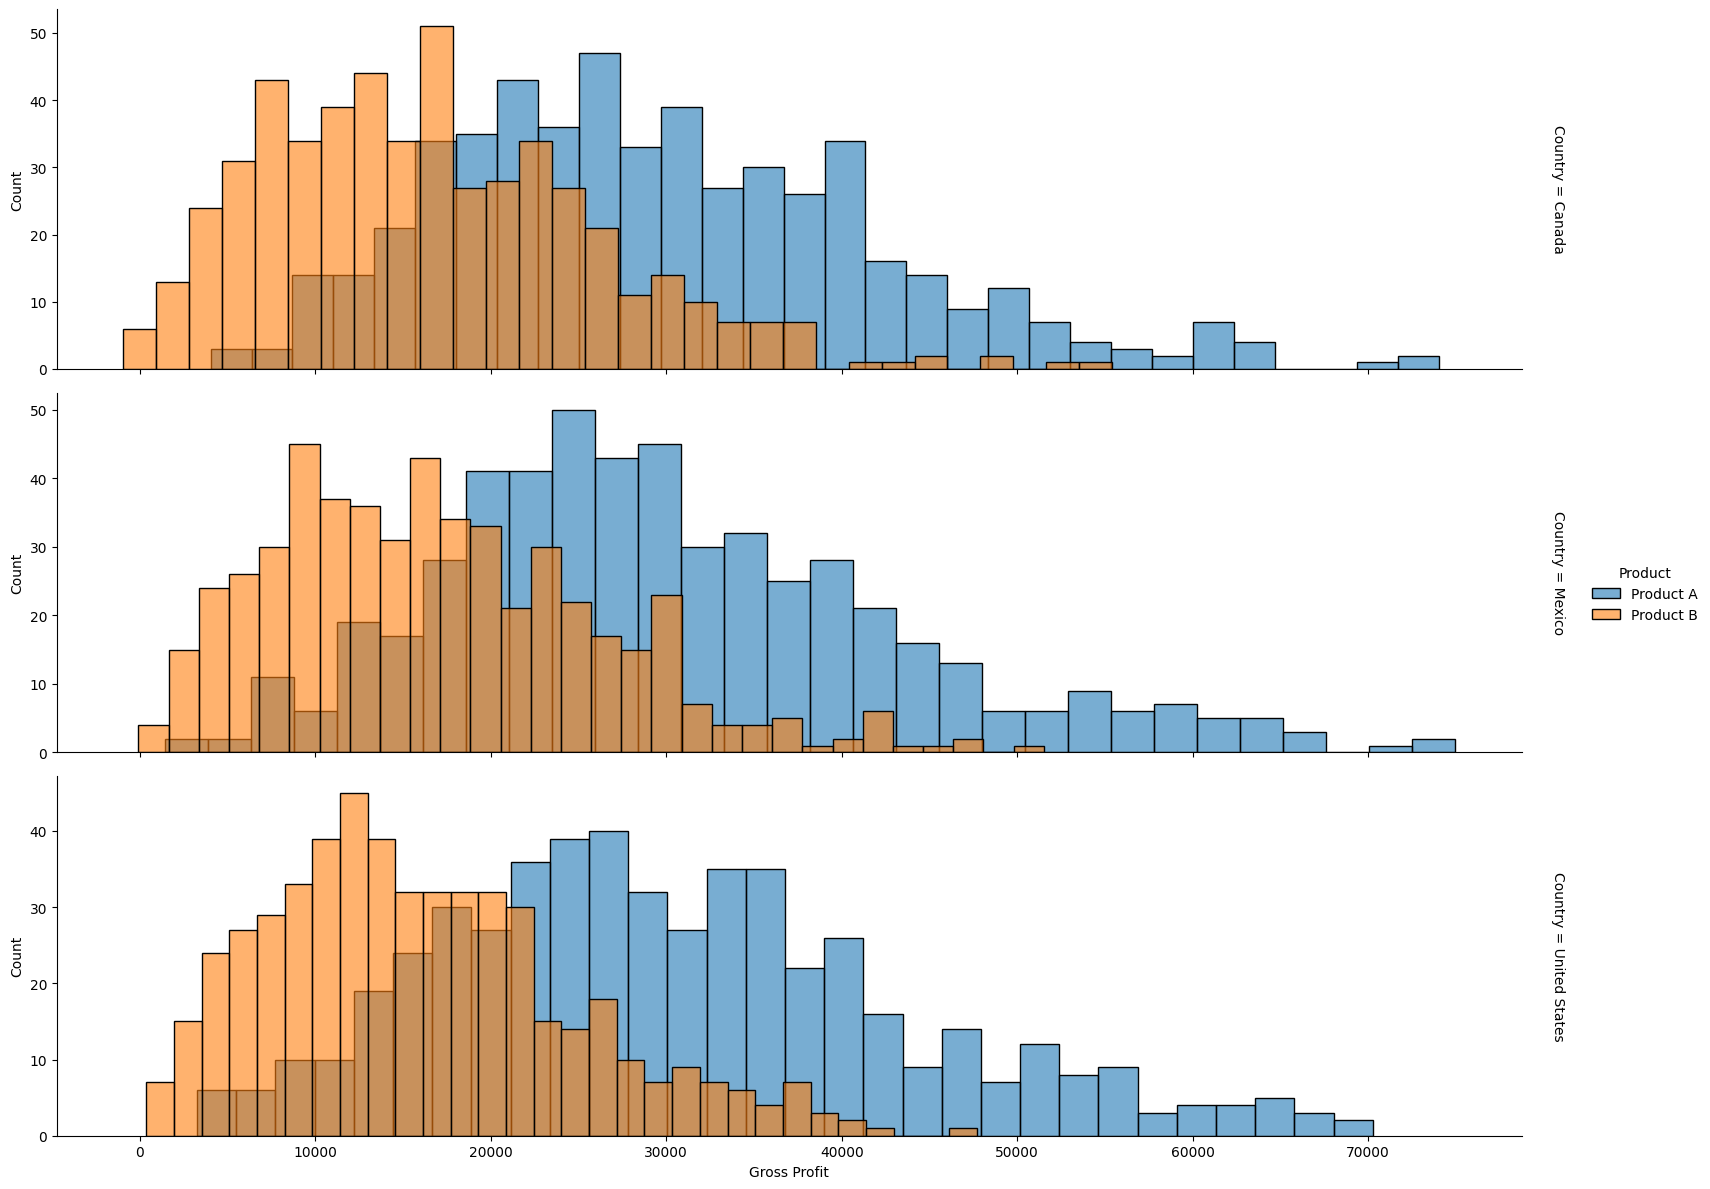

In [ ]:


# Create a FacetGrid to separate the data by country
g = sns.FacetGrid(joined_data, row='Country', hue='Product', height=4, aspect=4, sharey=False, margin_titles=True)
g.map(sns.histplot, 'Gross_Profit', bins=30, kde=False, alpha=0.6)

# Adding a legend
g.add_legend(title='Product')

# Adjusting titles and labels
g.set_axis_labels('Gross Profit', 'Count')
g.set_titles("{row_name}")

plt.show()

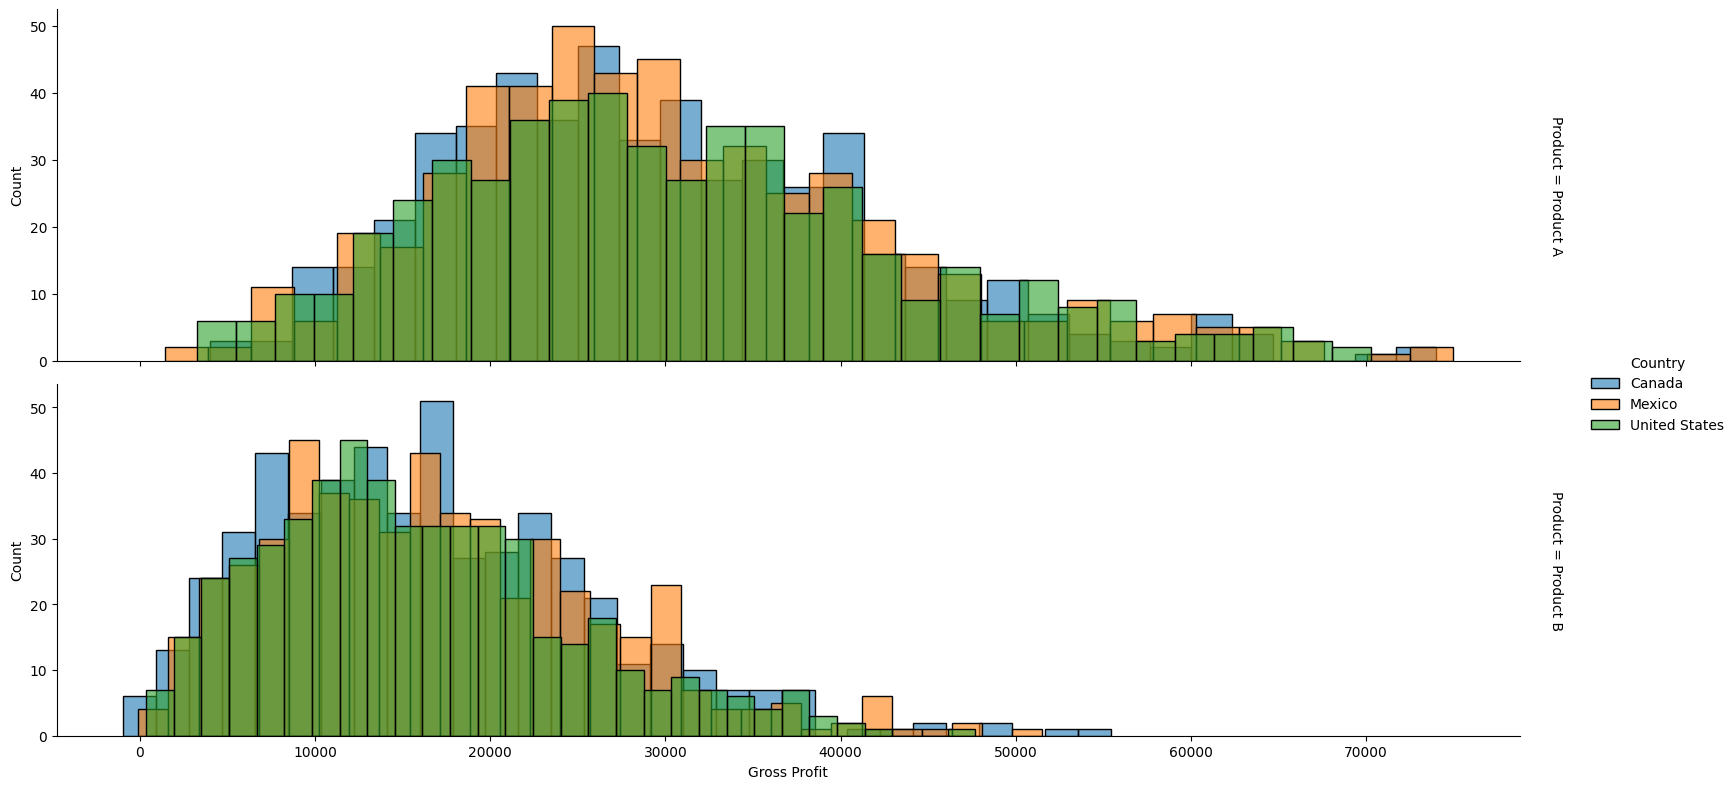

In [ ]:
g = sns.FacetGrid(joined_data, row='Product', hue='Country', height=4, aspect=4, sharey=False, margin_titles=True)
g.map(sns.histplot, 'Gross_Profit', bins=30, kde=False, alpha=0.6)

# Adding a legend
g.add_legend(title='Country')

# Adjusting titles and labels
g.set_axis_labels('Gross Profit', 'Count')
g.set_titles("{row_name}")

plt.show()

# Predictive Forecasting

## Prompt
Now that we can see there is a lot of variation between the products but not between the countries, let us focus on product.

Can you construct a timeseries visuals of both product profit over time, and include a six month forecast with error bands?

### Output
To create a time series visualization of product profit over time with a six-month forecast including error bands, we can use Facebook's Prophet library for the forecasting and matplotlib for the visualization. This involves several steps:

* Preparation: Organize your data to have the dates and profits correctly formatted.
* Forecasting: Use Prophet to forecast future profits for each product.
* Visualization: Plot the historical data along with the forecast and its uncertainty intervals.

In [ ]:

import matplotlib.pyplot as plt

def forecast_product_sales(df, product_name, periods=6, freq='M', interval_width=0.95):
    """
    Forecast sales for a given product using Prophet.

    Parameters:
    - df: DataFrame containing the data.
    - product_name: Name of the product to forecast.
    - periods: Number of periods to forecast into the future.
    - freq: Frequency of the forecast ('D' for daily, 'W' for weekly, 'M' for monthly, etc.).
    - interval_width: Confidence interval width.

    Returns:
    - model: The fitted Prophet model.
    - forecast: DataFrame containing the forecast.
    """
    # Filter the DataFrame for the specified product
    df_product = df[df['Product'] == product_name][['ISO Week Start Date', 'Gross_Profit']]
    df_product.rename(columns={'ISO Week Start Date': 'ds', 'Gross_Profit': 'y'}, inplace=True)
    df_product['ds'] = pd.to_datetime(df_product['ds'])

    # Initialize and fit the Prophet model
    model = Prophet(interval_width=interval_width)
    model.fit(df_product)

    # Create a DataFrame to hold future predictions
    future = model.make_future_dataframe(periods=periods, freq=freq)

    # Generate the forecast
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast)
    plt.title(f'{product_name} Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

    # Plot the forecast components
    model.plot_components(forecast)
    plt.show()

    return model, forecast

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpriwx48cm/jziecp3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpriwx48cm/rljdlll0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22219', 'data', 'file=/tmp/tmpriwx48cm/jziecp3n.json', 'init=/tmp/tmpriwx48cm/rljdlll0.json', 'output', 'file=/tmp/tmpriwx48cm/prophet_modelny8lbgmf/prophet_model-20240319234650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:46:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:46:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


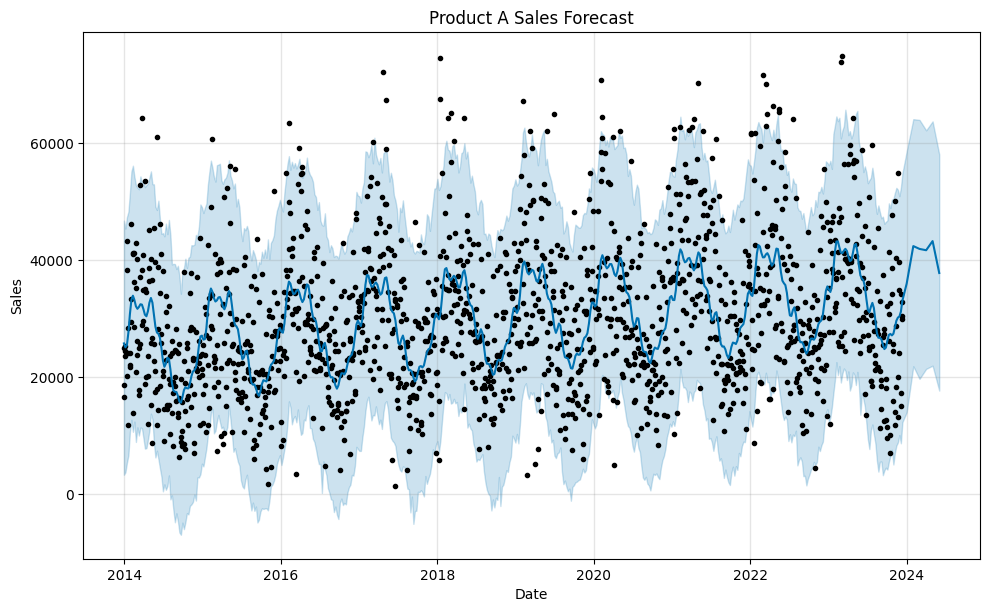

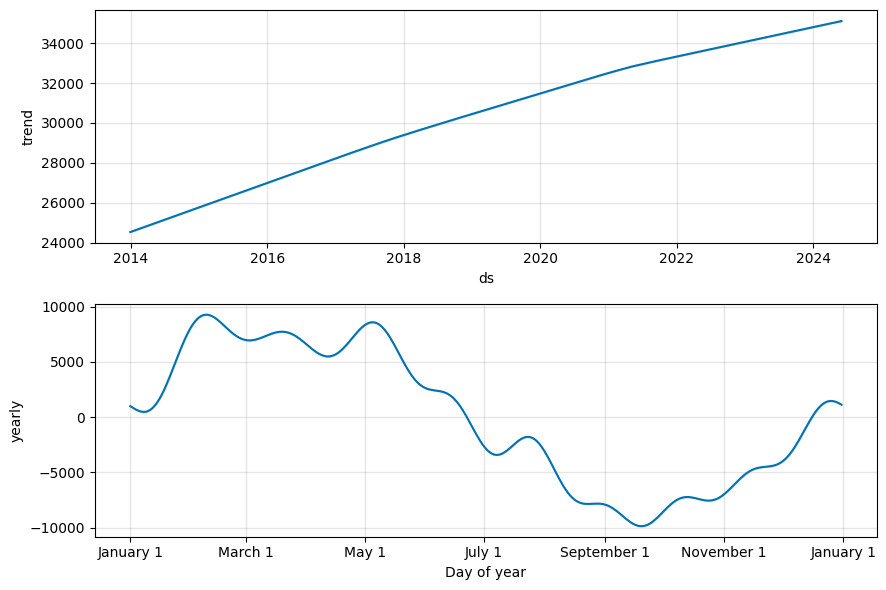

In [ ]:
model_a, forecast_a = forecast_product_sales(joined_data,'Product A')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpriwx48cm/3_mfpt2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpriwx48cm/7bps50v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89845', 'data', 'file=/tmp/tmpriwx48cm/3_mfpt2_.json', 'init=/tmp/tmpriwx48cm/7bps50v9.json', 'output', 'file=/tmp/tmpriwx48cm/prophet_modela5to3uf6/prophet_model-20240319234654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:46:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


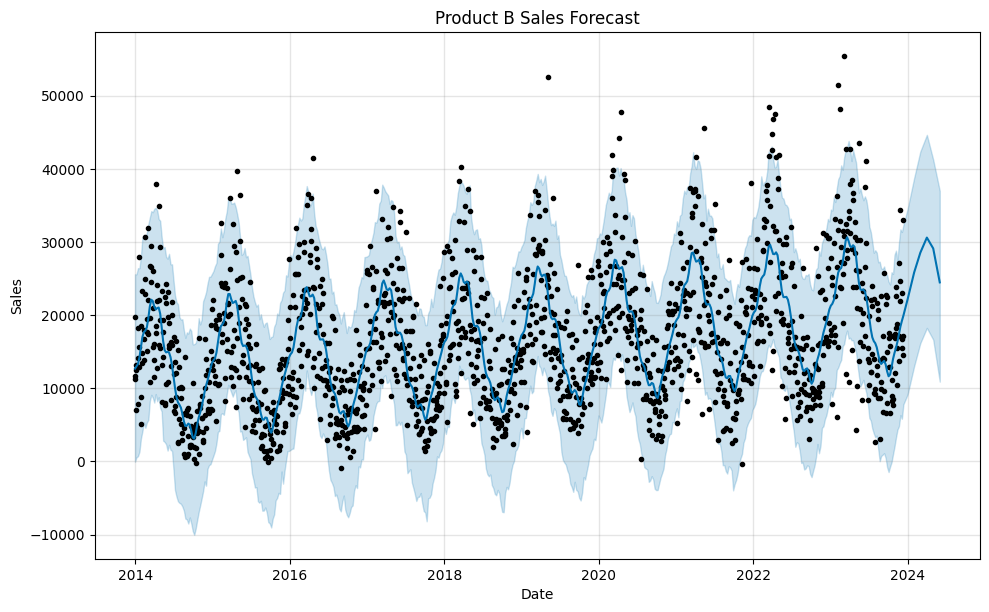

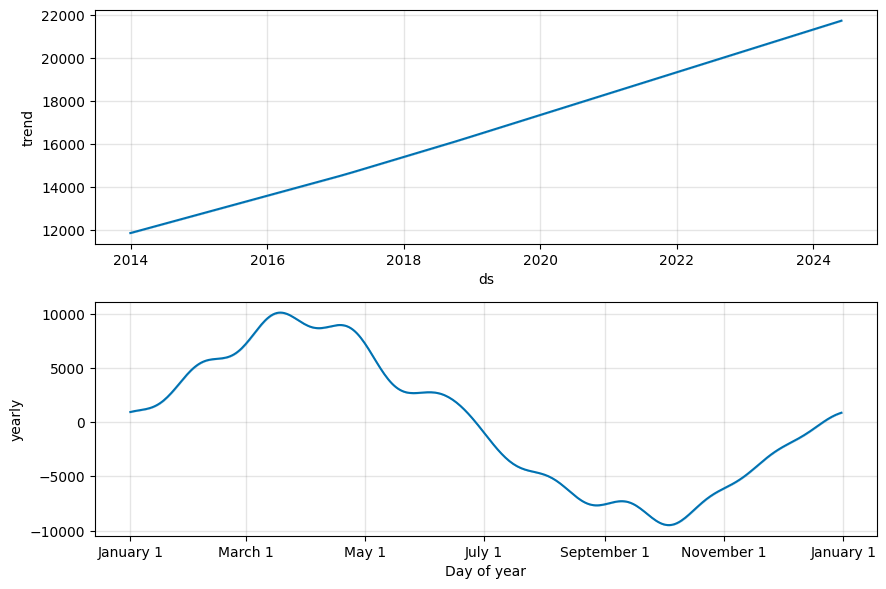

In [ ]:
model_b, forecast_b = forecast_product_sales(joined_data,'Product B')

### Prompt used to create sample data
Could you provide me with a python script that generates a sample dataset? I would like this dataset to be similar to a product sales report extracted from SAP or other ERP system. I would like it to have the following Columns:
- ISO Week Start Date (Date):
- Country (String): possible values "United States", "Canada", "Mexico"
- Account (String): possible values "Revenue", "Labor", "Raw Materials",  "Admin", "Utilities"
- Product (String): possible values "Product A", "Product B", "Overhead"
- Value in USD (Currency)

The data should not be completely random. For example
- There should similar distribution of Values over time for any given combination of Product, Account, and Country.
- Labor, Raw Materials, and Revenue should be be highly correlated over time within a given combination of Product and Country.
- Revenue should be inversely correlated between Product A and Product B
- Admin and Utilities should stay relatively consistent overtime and have no correlation to other accounts within a given product
- For a given week, Revenue should be higher than the sum of Labor, Raw Materials, Admin.

Also added you update this script to perform the steps in the following order
1. calculate revenue for products a and b,
2. calculate admin and utilities a small percent of respective revenue, with a small amount of variation
3. Apply the seasonal adjustment to revenue
4. calculate labor and raw materials as approximately 25-40% of the now seasonal revenue

This will give us relatively fixed overhead costs and seasonal variable costs.

In [ ]:
import numpy as np
from datetime import datetime, timedelta

def generate_week_dates(start_date, num_weeks=520):
    return [start_date + timedelta(weeks=wk) for wk in range(num_weeks)]

def generate_seasonal_trend(week_num, amplitude=25000, period=52, phase_shift=0, linear_trend=50):
    """Generate a seasonal trend with an optional linear trend component."""
    seasonal_component = amplitude * np.sin(2 * np.pi * (week_num + phase_shift) / period)
    linear_component = linear_trend * week_num
    return seasonal_component + linear_component

# Initialize base data
start_date = datetime(2013, 12, 30)
countries = ["United States", "Canada", "Mexico"]
accounts = ["Revenue", "Labor", "Raw Materials", "Admin", "Utilities"]
products = ["Product A", "Product B"]
dates = generate_week_dates(start_date)

data_rows = []  # List to hold all rows of data

np.random.seed(42)  # For reproducibility

week_num = 0  # Initialize week number for trend calculation
for date in dates:
    for country in countries:
        for product in products:
            # Calculate base revenue
            base_revenue = np.random.randint(50000, 100000) if product == "Product A" else np.random.randint(20000, 50000)

            # Apply seasonal adjustment to revenue
            seasonal_adjustment = generate_seasonal_trend(week_num)
            revenue = base_revenue + seasonal_adjustment

            # Calculate admin and utilities as a percent of revenue with Gaussian distribution
            admin = revenue * max(0, np.random.normal(loc=0.04, scale=0.01))  # Mean at 4%, with some variation
            utilities = revenue * max(0, np.random.normal(loc=0.025, scale=0.005))  # Mean at 2.5%, with some variation

            # Calculate labor and raw materials as 25-40% of the seasonal revenue with Gaussian distribution
            labor_percentage = np.random.normal(loc=0.325, scale=0.075)  # Centered at 32.5%
            raw_materials_percentage = np.random.normal(loc=0.325, scale=0.075)  # Centered at 32.5%
            labor = revenue * max(0, labor_percentage)
            raw_materials = revenue * max(0, raw_materials_percentage)

            # Append rows for each account type
            data_rows.extend([
                {'ISO Week Start Date': date, 'Country': country, 'Account': 'Revenue', 'Product': product, 'Value in USD': revenue},
                {'ISO Week Start Date': date, 'Country': country, 'Account': 'Labor', 'Product': product, 'Value in USD': labor},
                {'ISO Week Start Date': date, 'Country': country, 'Account': 'Raw Materials', 'Product': product, 'Value in USD': raw_materials},
                {'ISO Week Start Date': date, 'Country': country, 'Account': 'Admin', 'Product': product, 'Value in USD': admin},
                {'ISO Week Start Date': date, 'Country': country, 'Account': 'Utilities', 'Product': product, 'Value in USD': utilities},
            ])
    week_num += 1  # Increment week number

# Convert list of dicts to DataFrame
data = pd.DataFrame(data_rows)



### Follow up prompt
Can you provide python code to create another dummy data csv based on this data? It needs to represent units produced and units sold for a given combination of Product, Country and Week. Units produced should be closely correlated with raw material costs, units sold should be closely correlated with revenue. The resulting costs per unit produced and revenue per unit sold should be similar between countries.

...after initial attempt

 I think it would be a little more useful as dummy data if we had more pronounced relationships between our revenue, costs, and units. Could we stratify the average raw material costs and revenue by Country and Product first, then calculate Units produced and sold in the same period?


 #### Output
 To create a more nuanced dummy dataset with pronounced relationships between revenue, costs, and units produced/sold, stratified by Country and Product, we can adjust the approach as follows:

1. **Stratify Raw Material Costs and Revenue**: Calculate the average raw material costs and average revenue stratified by Country and Product. This will allow us to account for variations in costs and revenue across different products and countries.

2. **Calculate Units Produced and Sold**: Based on the stratified averages, generate "Units Produced" and "Units Sold" for each combination of Country, Product, and ISO Week Start Date. The calculation will consider the stratified average costs and revenue to ensure a realistic and meaningful correlation.

3. **Adjust Units Produced and Sold**: Ensure that the "Units Sold" do not exceed "Units Produced" within each stratification, maintaining logical consistency.

Here's a Python script to implement these steps.

This script performs the following operations:
- Calculates average raw material costs and revenue, stratified by Country and Product.
- Merges these averages with a unique list of combinations of ISO Week Start Date, Country, and Product.
- Generates "Units Produced" and "Units Sold" for each record, ensuring "Units Sold" do not exceed "Units Produced".
- Calculates and includes the cost per unit produced and revenue per unit sold based on the stratified averages.
- Saves this detailed and stratified dummy dataset to a new CSV file for further use or analysis.

This approach provides a more nuanced and realistic set of dummy data, reflecting variations across different stratifications and ensuring logical consistency within the generated units and financial metrics.

#### Code

In [ ]:
# Stratify raw material costs and revenue by Country and Product
avg_costs = data[data['Account'] == 'Raw Materials'].groupby(['Country', 'Product'])['Value in USD'].mean().reset_index()
avg_revenue = data[data['Account'] == 'Revenue'].groupby(['Country', 'Product'])['Value in USD'].mean().reset_index()

# Join the stratified averages back to a unique list of combinations of ISO Week Start Date, Country, and Product
unique_combinations = data[['ISO Week Start Date', 'Country', 'Product']].drop_duplicates().reset_index(drop=True)
dummy_data = unique_combinations.merge(avg_costs, on=['Country', 'Product'], how='left')
dummy_data = dummy_data.merge(avg_revenue, on=['Country', 'Product'], how='left')
dummy_data.rename(columns={'Value in USD_x': 'Avg Raw Material Cost', 'Value in USD_y': 'Avg Revenue'}, inplace=True)

# Calculate Units Produced and Sold based on stratified averages
# Adjust the formula as needed for your specific context
dummy_data['Units Produced'] = np.round((dummy_data['Avg Raw Material Cost'] / 100) * np.random.uniform(0.8, 1.2, size=len(dummy_data)))
dummy_data['Units Sold'] = np.round((dummy_data['Avg Revenue'] / 150) * np.random.uniform(0.8, 1.2, size=len(dummy_data)))

# Ensure Units Sold does not exceed Units Produced by adjusting them to integers
dummy_data['Units Sold'] = dummy_data.apply(lambda row: min(row['Units Sold'], row['Units Produced']), axis=1).astype(int)
dummy_data['Units Produced'] = dummy_data['Units Produced'].astype(int)

# Calculate costs per unit produced and revenue per unit sold for a more detailed analysis
dummy_data['Cost per Unit Produced'] = dummy_data['Avg Raw Material Cost'] / dummy_data['Units Produced']
dummy_data['Revenue per Unit Sold'] = dummy_data['Avg Revenue'] / dummy_data['Units Sold']
